<a href="https://colab.research.google.com/github/benintw/DL_intro/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 收集資料

In [9]:
from tensorflow.keras.datasets import mnist
(train_feature, train_label), (test_feature, test_label) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [10]:
print(len(train_feature), len(train_label))

60000 60000


In [11]:
print((train_feature.shape), (train_label.shape))

(60000, 28, 28) (60000,)


數字圖形如下形如下, 標籤為: 3


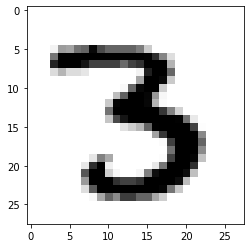

In [12]:
import matplotlib.pyplot as plt

print('數字圖形如下形如下, 標籤為: {}'.format(train_label[12]))
plt.imshow(train_feature[12], cmap='binary')

In [13]:
print(train_feature[12])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  12  99  91 142 155 246 182 155 155 155 155 131  52   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 138 254 254 254 254 254 254 254 254 254 254 254 252 210 122
   33   0   0   0   0   0   0   0   0   0]
 [  0   0   0 220 254 254 254 235 189 189 189 189 150 189 205 254 254 254
   75   0   0   0   0   0   0   0   0   0]
 [  0   0   0  35  74  35  35  25   0   0   0   0   0   0  13 22

In [14]:
print(train_label[12])

3


## 使用ipywidgets 
#### 建立滑桿快速查看圖片
- 語法為:

```python
interact(function_name, variable_name = (range))
```

In [15]:
from ipywidgets import interact
import matplotlib.pyplot as plt

def show_number(n):
    print('數字圖形如下形如下, 標籤為: {}'.format(train_label[n]))
    plt.imshow(train_feature[n], cmap='Greys')

interact(show_number,n=(0,59999))

interactive(children=(IntSlider(value=29999, description='n', max=59999), Output()), _dom_classes=('widget-int…

<function __main__.show_number>

# 2. 資料預處理
## 2.1 特徵資料預處理
- 每一個 MNIST 數字圖片都是一張一張28x28 的2維向量圖片, 
必須轉換為必須轉換為 784個數值的1維向量, 並將數值標準化, 才能增加模型訓練的效率. 

In [16]:
train_feature = train_feature.reshape(len(train_feature), 784) # reshape
test_feature = test_feature.reshape(len(test_feature),784) # reshape
print(train_feature.shape, test_feature.shape)

(60000, 784) (10000, 784)


In [17]:
print(type(train_feature))

<class 'numpy.ndarray'>


In [18]:
print(train_feature[0]) # shape = (784,1)

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [19]:
train_feature[0].shape

(784,)

In [20]:
# 做標準化標準化 num / 255 
train_feature = train_feature / 255
test_feature = test_feature / 255
print(test_feature[0]) 

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

## 2.2 標籤資料預處理
- 標籤值0~9 的數字, 為了避免數值大小的干擾, 將其轉換為轉換為 One-Hot 編碼
- 使用np_utils.to_categorical() 方法可以將數字轉換為為One-Hot 編碼

In [21]:
print(train_label[:5])

[5 0 4 1 9]


In [22]:
from keras.utils import np_utils
train_label = np_utils.to_categorical(train_label)
test_label = np_utils.to_categorical(test_label)
print(train_label[0:5])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


# 3. 建立模型

In [23]:
# 建立3個隱藏層的深度神經網路模型:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [24]:
# 建立建立Sequential物件物件
model = Sequential()

In [25]:
# 建立FNN:
    # units: 神經元數量數量
    # input_dim: 此參數非必填, 若設定此參數參數, 表示建立輸入層及第一層隱藏層, 參數值為輸入資料數量; 若為設定此參數參數, 表示建立隱藏層或輸出層.
    # activation: 設定激勵函式激勵函式

# 首先建立輸入層及第1層, 輸入資料輸入資料784, 神經元50個, 激勵函式ReLU
model.add(Dense(units= 50, input_dim= 784, activation= 'relu'))

# 第2層以後就不需要設定輸入資料數量, 因為其輸入是由前一層而來, 系統會自動計算輸入資料數量.
# 第2層有100個神經元, 
model.add(Dense(units=100, activation='relu'))

# 第3層有200個神經元
model.add(Dense(units=200, activation='relu'))

# 最後建立輸出層: 輸出資料有10個, 激勵函式為為SoftMax
model.add(Dense(units=10, activation='softmax'))


In [26]:
# 建立完模型後, 查看模型的權重數量是否合乎預期
model.summary()

# 66,560 為權重總數
# 計算方式:
# 輸入資料數數 * 神經元數 + 偏置數

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 50)                39250     
                                                                 
 dense_5 (Dense)             (None, 100)               5100      
                                                                 
 dense_6 (Dense)             (None, 200)               20200     
                                                                 
 dense_7 (Dense)             (None, 10)                2010      
                                                                 
Total params: 66,560
Trainable params: 66,560
Non-trainable params: 0
_________________________________________________________________


# 4. 訓練模型

In [27]:
# 先設定模型的訓練方式
# 模型變數.compile(loss = 損失函式, optimizer = 最佳化函式, metrics = 評估標準)
    # loss: 常用函式有 mean_squared_error 或 categorical_crossentropy
    # optimizer: sgd, rmsprop, adam
    # metrics: 此參數非必填. 常用值: accuracy 或 mse
model. compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

# 然後用用fit( )方法進行訓練,
# 模型變數.fit(x=特徵值, y=標籤, validation_split = 驗證資料比率, epochs=訓練次數, shuffle=布林值, 
#               batch_size = 批次資料數量, verbose=顯示模式)
    # x: 設定訓練特徵值
    # y: 設定訓練標籤值
    # validation_split = 非必填. 設定驗證資料比率, 例如0.2 表示將訓練資料保留20%當作驗證資料. 預設值為0 即全部資料都會做訓練用.
    # epochs: 非必填, 設定訓練次數, 預設值為1.
    # shuffle: 非必填, True 為先將資料打亂再進行訓練, 預設為True
    # batch_size: 非必填, 設定每次處理的資料筆數, 預設為1. 
    # verbose: 非必填, 設定是否顯示訓練過程, 0為不顯示, 1為詳細顯示, 2為簡易顯示. auto為由系統決定, 預設為auto.
model.fit(x = train_feature, y = train_label, validation_split=0.2,epochs=10, batch_size=200, verbose=2)
    # 訓練資料保留20%作為驗證資料
    # 訓練10次
    # 每批處理200筆資料
    # 簡易顯示訓練過程

# loss: 使用訓練資料時時, 得到的損失函式誤差值(越小代表準確率越高)
# accuracy: 使用訓練資料時時, 得到的評估準確率(值在0~1, 越大代表準確率越高)
# val_loss: 使用驗證資料時, 得到的損失函式誤差值(越小代表準確率越高)
# val_accuracy: 使用驗證資料時時, 得到的評估準確率(值在0~1, 越大代表準確率越高)

Epoch 1/10
240/240 - 4s - loss: 0.4799 - accuracy: 0.8688 - val_loss: 0.2175 - val_accuracy: 0.9358 - 4s/epoch - 15ms/step
Epoch 2/10
240/240 - 1s - loss: 0.1867 - accuracy: 0.9457 - val_loss: 0.1565 - val_accuracy: 0.9530 - 652ms/epoch - 3ms/step
Epoch 3/10
240/240 - 1s - loss: 0.1346 - accuracy: 0.9603 - val_loss: 0.1333 - val_accuracy: 0.9603 - 669ms/epoch - 3ms/step
Epoch 4/10
240/240 - 1s - loss: 0.1072 - accuracy: 0.9679 - val_loss: 0.1236 - val_accuracy: 0.9637 - 689ms/epoch - 3ms/step
Epoch 5/10
240/240 - 1s - loss: 0.0884 - accuracy: 0.9735 - val_loss: 0.1113 - val_accuracy: 0.9682 - 708ms/epoch - 3ms/step
Epoch 6/10
240/240 - 1s - loss: 0.0749 - accuracy: 0.9774 - val_loss: 0.1246 - val_accuracy: 0.9628 - 659ms/epoch - 3ms/step
Epoch 7/10
240/240 - 1s - loss: 0.0644 - accuracy: 0.9803 - val_loss: 0.1095 - val_accuracy: 0.9691 - 669ms/epoch - 3ms/step
Epoch 8/10
240/240 - 1s - loss: 0.0535 - accuracy: 0.9837 - val_loss: 0.1060 - val_accuracy: 0.9702 - 717ms/epoch - 3ms/step
Ep

# 5. 評估模型準確率

In [28]:
# evaluate() 方法可以評估模型的損失函示誤差值和準確率
# 評估變數 = 模型變數.evaluate(x = 特徵值, y = 標籤, verbose = 顯示模式)
    # x: 設定評估資料特徵值
    # y: 設定評估資料標籤值
    # verbose: 非必填, 設定是否顯示訓練過程, 0為不顯示, 1為詳細顯示, 2為簡易顯示. auto為由系統決定, 預設為1.
score = model.evaluate(x=test_feature,y = test_label, verbose=2)
print('\n準確率= ',score[1])

313/313 - 1s - loss: 0.0961 - accuracy: 0.9707 - 835ms/epoch - 3ms/step

準確率=  0.9707000255584717


# 模型儲存

In [29]:
# 模型變數. save(檔名)
model.save("mnist_model_trained.h5")

# 載入模型

In [30]:
# 當需要使用已儲存為模型檔案的模型時, 就可以直接載入已訓練好的模型作為預測.
# 首先載入模型模組:
from tensorflow.keras.models import load_model

# 載入語法:
    # 模型變數 = load_model("模型檔名")

model_two = load_model("mnist_model_trained.h5")
score2 = model_two.evaluate(x = test_feature, y = test_label, verbose=2)
print('\nAccuracy = ', score[1])
print("\nLoss = ", score[0])

313/313 - 1s - loss: 0.0961 - accuracy: 0.9707 - 672ms/epoch - 2ms/step

Accuracy =  0.9707000255584717

Loss =  0.09609247744083405
